# Time Series Data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil import parser

## Datetime in Python

Specifying a datetime object

In [2]:
dt = datetime(year=2017, month=4, day=4, hour=11, minute=12)

Or extract info from a string

In [3]:
dt = parser.parse("4th of July,2017, 3:05pm")

Printing a datetime object

In [4]:
print('Day of the Week:', dt.strftime('%A'))
print('Month:', dt.strftime('%B'))
print('Year:', dt.strftime('%Y'))
print('Hour:', dt.strftime('%H'))
print('Minute:', dt.strftime('%M'))

Day of the Week: Tuesday
Month: July
Year: 2017
Hour: 15
Minute: 05


Go to [strftime.org] for full Python strftime formats

## Datetime in Numpy

Stores datetime in 64 bits. Uses YYY-MM-DD notation so data can be easily sorted.

In [5]:
date = np.datetime64("2015-07-04T11:03")

Vector arithmetic works, increasing the datetime object by one day:

In [6]:
date += np.arange(12) * 60 * 24 # number of minutes

Doing the same as above but with a datetime that included seconds

In [7]:
date = np.datetime64("2015-07-04T11:03:01")
date += np.arange(12) * 60 * 24 * 60

Fine-grained time is also possible if you want the time to a fraction of a second

## Datetime in Pandas

Has a `Timestamp` class.

`strftime` also works.

In [9]:
dt = pd.to_datetime('4th of July,2017, 3:05pm')
dt = pd.to_datetime('2015-07-04T15:03:11.2423434')

print('Day of the Week:', dt.strftime('%A'))

Day of the Week: Saturday


Vectorized operations also supported.

Create a Series of 12 consecutive days:

In [11]:
dt += pd.to_timedelta(np.arange(12), 'D')
display(dt)

DatetimeIndex(['2015-07-04 15:03:11.242343400',
               '2015-07-06 15:03:11.242343400',
               '2015-07-08 15:03:11.242343400',
               '2015-07-10 15:03:11.242343400',
               '2015-07-12 15:03:11.242343400',
               '2015-07-14 15:03:11.242343400',
               '2015-07-16 15:03:11.242343400',
               '2015-07-18 15:03:11.242343400',
               '2015-07-20 15:03:11.242343400',
               '2015-07-22 15:03:11.242343400',
               '2015-07-24 15:03:11.242343400',
               '2015-07-26 15:03:11.242343400'],
              dtype='datetime64[ns]', freq='2D')

### Types of Time Indices

* `DatetimeIndex`: List of `Timestamp` objects (July 4th, 1776)
* `PeriodIndex`: Seperated into periods (April 2020)
* `TimedeltaIndex`: A duration of time (5 seconds)

### Using DatetimeIndex

In [14]:
myIndex = date
data = pd.Series(np.arange(12), index=myIndex)
display(data)

2015-07-04 11:03:01     0
2015-07-05 11:03:01     1
2015-07-06 11:03:01     2
2015-07-07 11:03:01     3
2015-07-08 11:03:01     4
2015-07-09 11:03:01     5
2015-07-10 11:03:01     6
2015-07-11 11:03:01     7
2015-07-12 11:03:01     8
2015-07-13 11:03:01     9
2015-07-14 11:03:01    10
2015-07-15 11:03:01    11
dtype: int32

When `DatetimeIndex` is created, querying on the datetime is easy

In [17]:
display(data.loc['2015']) # 2015 data
display(data.loc['2015-04':'2015-09']) # data between April and September 2015

2015-07-04 11:03:01     0
2015-07-05 11:03:01     1
2015-07-06 11:03:01     2
2015-07-07 11:03:01     3
2015-07-08 11:03:01     4
2015-07-09 11:03:01     5
2015-07-10 11:03:01     6
2015-07-11 11:03:01     7
2015-07-12 11:03:01     8
2015-07-13 11:03:01     9
2015-07-14 11:03:01    10
2015-07-15 11:03:01    11
dtype: int32

2015-07-04 11:03:01     0
2015-07-05 11:03:01     1
2015-07-06 11:03:01     2
2015-07-07 11:03:01     3
2015-07-08 11:03:01     4
2015-07-09 11:03:01     5
2015-07-10 11:03:01     6
2015-07-11 11:03:01     7
2015-07-12 11:03:01     8
2015-07-13 11:03:01     9
2015-07-14 11:03:01    10
2015-07-15 11:03:01    11
dtype: int32

### `PeriodIndex` Example

Starting in 2012, creates periods for 10 months

In [18]:
periodidx = pd.period_range('2012-01-01',periods=10,freq='M')
display(periodidx)

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
             '2012-07', '2012-08', '2012-09', '2012-10'],
            dtype='period[M]', freq='M')

`TimedeltaIndex` contains a list of intervals

In [20]:
date = pd.to_datetime('2020-01-01')
myIndex = date + pd.to_timedelta(np.arange(12),'D') * 30
display(myIndex - myIndex[0])

TimedeltaIndex([  '0 days',  '30 days',  '60 days',  '90 days', '120 days',
                '150 days', '180 days', '210 days', '240 days', '270 days',
                '300 days', '330 days'],
               dtype='timedelta64[ns]', freq=None)

### Using Ranges

In [21]:
display(pd.date_range('2015-07-03',periods=8,freq='M')) # Returns DatetimeIndex
display(pd.period_range('2015-07-03',periods=8,freq='M')) # Returns PeriodIndex
display(pd.timedelta_range(0,periods=10,freq='H')) # Returns TimedeltaIndex

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequency Codes

* D=day, W=week, M=month, Q=quarter, A=year, H=hour, T=minute, S=second, L=millisecond, B=business day, BM=business month, BQ=business quarter, BA=business year, BH=business hour
* By default, monthly/quarterly/annually frequency codes go to the end of the period, Add S to go to start of the period instead
* Codes can also be combined

In [22]:
display(pd.date_range('2015-07',periods=8,freq='MS'))
display(pd.timedelta_range(0,periods=9,freq='2H30T'))

DatetimeIndex(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', freq='MS')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

## Stocks Example

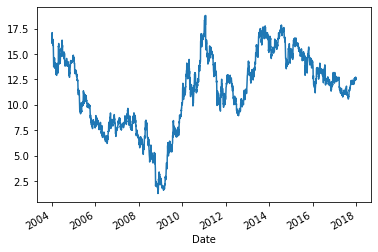

In [28]:
%matplotlib inline
from pandas_datareader import data
import matplotlib.pyplot as plt

ford = data.DataReader('F','yahoo',start='2004',end='2018')
ford = ford['Close']
ford.plot()

### The `asfreq` and `resample` Methods

* `alpha` is the level of transparency
* `resample` reports the average of the previous year
* `asfreq` reports the value at the end of the year


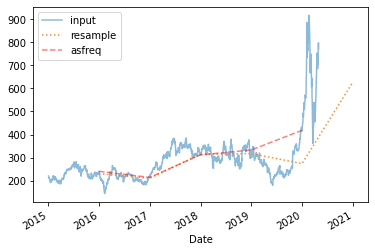

In [32]:
tes = data.DataReader('TSLA','yahoo',start='2015',end='2021')
tes = tes['Close']
tes.plot(alpha=0.5,style='-')
tes.resample('BA').mean().plot(alpha=0.9,style=':')
tes.asfreq('BA').plot(alpha=0.5,style='--',color='red')
plt.legend(['input','resample','asfreq'],loc='upper left')

### Rolling Windows

* Creates a rolling window around every point
* The size of the window is 365 days, and the point is the center of the window
* For each window, compute the mean and standard deviation

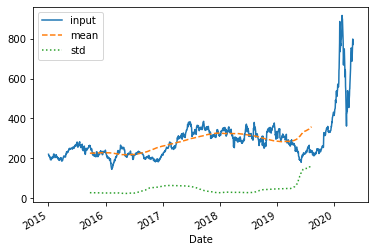

In [33]:
rolling = tes.rolling(365,center=True) # rolling info for 1 year
data = pd.DataFrame({'input':tes,'mean':rolling.mean(),'std':rolling.std()})
data.plot(style=['-','--',':'])